# M50 Homework 3

## Alex Craig

## Exercise 1.
(Bias and consistency): Let 

$$
X \sim \text{Bernoulli}(q)
$$

and $X_1, ..., X_N$ denote $N$ samples of $X$. For each of the following estimators of $q$, (i) write down the standard error and (ii) state whether they are un-biased and/or consistent. In each case, you can write down an exact formula for the standard error, so you do NOT need to use the CLT.

### Part A
$$
\hat{q}_0 = \frac{1}{N} \sum_{i=1}^N X_i
$$

### Solution
We know that $SE(\hat{q}_0) = \sqrt{Var(\hat{q}_0)}$.

$$
Var(\hat{q}_0) = Var(\frac{1}{N} \sum_{i=1}^N X_i) = \frac{1}{N^2} Var(\sum_{i=1}^N X_i)
$$

Because each $X_i$ is independent, we can write:
$$
Var(\hat{q}_0) = \frac{1}{N^2} \sum_{i=1}^N Var(X_i) = \frac{1}{N^2} \sum_{i=1}^N q(1-q) = \frac{1}{N^2} \times N \times q(1 - q) = \frac{q(1-q)}{N}
$$

$$
\Rightarrow SE(\hat{q}_0) = \sqrt{\frac{q(1-q)}{N}}
$$

Let's check if $\hat{q}_0$ is unbiased:

$$
E(\hat{q}_0) = E(\frac{1}{N} \sum_{i=1}^N X_i) = \frac{1}{N} \sum_{i=1}^N E(X_i) = \frac{1}{N} \times N \times q = q
$$

$$
\Rightarrow \hat{q}_0 \text{ is unbiased}   
$$

Let's check if $\hat{q}_0$ is consistent:

$$
\lim_{N \to \infty} Var(\hat{q}_0) = \lim_{N \to \infty} \frac{q(1-q)}{N} = 0
$$

$$
\text{Variance approaches zero around } E[\hat{q}_0] = q \Rightarrow \hat{q}_0 \text{ is consistent}
$$

### Part B
$$
\hat{q}_1 = \frac{X}{N} + \frac{1}{\sqrt{N}}
$$

### Solution
We know that $SE(\hat{q}_1) = \sqrt{Var(\hat{q}_1)}$.

$$
Var(\hat{q}_0) = Var(\frac{X}{N} + \frac{1}{\sqrt{N}})
$$

$\frac{1}{\sqrt{N}}$ is constant, so $Var(\frac{X}{N} + \frac{1}{\sqrt{N}}) = Var(\frac{X}{N})$.

$$
\Rightarrow Var(\hat{q}_1) = Var(\frac{X}{N}) = \frac{1}{N^2} Var(X) = \frac{1}{N^2} \times q(1 - q) = \frac{q(1-q)}{N^2}
$$

$$
\Rightarrow SE(\hat{q}_1) = \sqrt{\frac{q(1-q)}{N^2}} = \frac{\sqrt{q(1-q)}}{N}
$$

Let's check if $\hat{q}_1$ is unbiased:

$$
E(\hat{q}_1) = E(\frac{X}{N} + \frac{1}{\sqrt{N}}) = \frac{1}{N} E(X) + \frac{1}{\sqrt{N}} = \frac{1}{N} q + \frac{1}{\sqrt{N}} \neq q
$$

$$
\Rightarrow \hat{q}_1 \text{ is biased}
$$


### Part C
$$
\hat{q}_2 = \frac{X}{\lfloor N / 2 \rfloor} + \sum_{i=1}^{\lfloor N / 2 \rfloor} X_i
$$

Note: $\lfloor x \rfloor$ denotes the floor function, which rounds $x$ down to the nearest integer.

### Solution

## Exercise 2. 
(Estimator of mean in exponential model): Let

$$
T \sim exp(\lambda)
$$

Recall that $E[T] = \frac{1}{\lambda}$. We can estimate $E[T]$ via the sample average of measurements $T_1, ..., T_n$:

The suggests that a natural way to estimate $\lambda$ is by:

$$
\hat{\lambda} = \frac{1}{\bar{T}} = \frac{n}{\sum_{i=1}^n T_i}
$$

### Part A
The goal of the first part of this problem is to show, using simulations, that this is in-fact a biased estimator of $\lambda$, although the bias decreases with $n$. To achieve this, you should do the following:
- Make a list of 100 values of $\lambda$ in any range.
- For each value of $\lambda$:
    - Simulate 10000 replicates of an experiment, where each replicate includes $n = 5$ values of $T$.
    - For each of these replicates, compute $\hat{\lambda}$ as defined above.
    - Then estimate the average $E[\hat{\lambda}]$ and save this value is a list.
- Make a plot of $\lambda$ vs. $|E[\hat{\lambda}] - \lambda|$.

### Solution

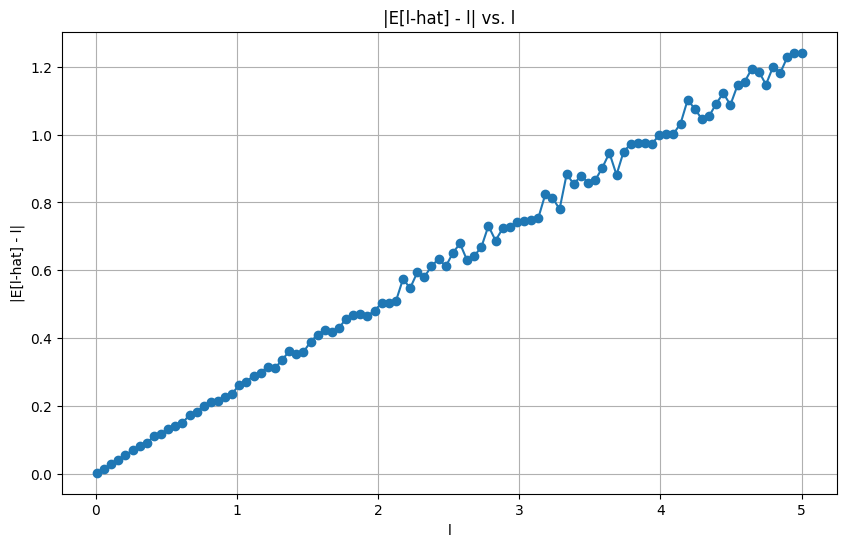

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Number of lambda values
num_lambdas = 100

# Number of replicates per lambda
num_replicates = 10000

# Number of T values per replicate
n = 5

# Create a list of 100 lambda values
lambdas = np.linspace(0.01, 5, num_lambdas)

# Initialize a list to store the average estimated lambdas
average_estimated_lambdas = []

for l in lambdas:
    # Simulate 10000 replicates of n values of T
    T_values = np.random.exponential(scale=1/l, size=(num_replicates, n))
    
    # Compute lambda hat for each replicate
    lambda_hats = n / np.sum(T_values, axis=1)
    
    # Compute the average of lambda hat and store in the list
    average_estimated_lambdas.append(np.mean(lambda_hats))

# Calculate absolute differences
differences = np.abs(np.array(average_estimated_lambdas) - lambdas)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(lambdas, differences, '-o')
plt.title('|E[l-hat] - l| vs. l')
plt.xlabel('l')
plt.ylabel('|E[l-hat] - l|')
plt.grid(True)
plt.show()